# Fake News Detection Using NLP
##### Fake news is everywhere online, confusing people and causing problems. This project tackles this issue by building a system to sniff out fake news articles.  
--- 

#### Importing the libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Step 1: Exploring the data.

The data is divided into two `.csv` files so lets read them in two dataframes.

In [2]:
true = pd.read_csv("True.csv") # True News DataFrame.
fake = pd.read_csv("Fake.csv") # Fake News DataFrame.

In [3]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
print("True Dimensions: ", true.shape)
print("Fake Dimensions: ", fake.shape)

True Dimensions:  (21417, 4)
Fake Dimensions:  (23481, 4)


#### The Data's Columns:
- <b>title</b>: Title of the document provided from the newsteller.
- <b>text</b>: Content of the document.
- <b>subject</b>: The topic of the news provided.
- <b>date</b>: The date of the news document.

> It is obvious that the data isn't labeled because it is already separated so before we concatenate the data together we will label it to have a target while progressing in the project.

In [6]:
# Adding labels to both dataframes
true['Label'] = "TRUE"
fake['Label'] = "FAKE"

#### Making our main dataframe containing all the news.

In [7]:
# Appending the dataframes into one
all_news = true.append(fake,ignore_index=True)
# Shuffling the dataframe and reseting the index
all_news = all_news.sample(frac = 1)
all_news.reset_index(drop=True,inplace=True)
# Printing
all_news.head(10)

C:\Users\Divo\AppData\Local\Temp\ipykernel_14032\1197721122.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_news = true.append(fake,ignore_index=True)


,title,text,subject,date,Label
0,Row over Pakistani paramilitary unit fuels pol...,ISLAMABAD (Reuters) - An unexplained dispute b...,worldnews,"October 5, 2017",TRUE
1,Democrats Spend Big On This Ad To Expose Trum...,The Democratic super PAC Priorities USA is spe...,News,"June 27, 2016",FAKE
2,"Mattis says 'very, very' confident in U.S. int...",WASHINGTON (Reuters) - President-elect Donald ...,politicsNews,"January 12, 2017",TRUE
3,McConnell says U.S. government shutdown over D...,WASHINGTON (Reuters) - U.S. Senate Republican ...,politicsNews,"December 3, 2017",TRUE
4,DONALD TRUMP STRIKES BACK: Reminds American Vo...,Trump spoke to his supporters at a rally in Cl...,politics,"Mar 13, 2016",FAKE
5,"Murdered North Korean Kim Jong Nam had $100,00...",KUALA LUMPUR (Reuters) - The half-brother of N...,worldnews,"October 11, 2017",TRUE
6,Congress should weigh U.S. regulation of gun '...,WASHINGTON (Reuters) - Congress should conside...,politicsNews,"November 1, 2017",TRUE
7,South Korea braces for possible new missile te...,SEOUL (Reuters) - South Korea braced for a pos...,worldnews,"September 8, 2017",TRUE
8,California lawmakers hire Holder for fights wi...,LOS ANGELES (Reuters) - Democratic lawmakers i...,politicsNews,"January 4, 2017",TRUE
9,Pennsylvania governor to veto latest budget as...,NEW YORK (Reuters) - Pennsylvania Governor Tom...,politicsNews,"March 16, 2016",TRUE


#### Describtion

In [8]:
all_news.describe().T

,count,unique,top,freq
title,44898,38729,Factbox: Trump fills top jobs for his administ...,14
text,44898,38646,,627
subject,44898,8,politicsNews,11272
date,44898,2397,"December 20, 2017",182
Label,44898,2,FAKE,23481


In [9]:
all_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   Label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


**It appears that there is no nulls in our data, let's check for duplicates.**

#### Checking for duplicates.

In [10]:
all_news.duplicated().sum()

209

We have 209 redundunt tuples in our data, our data has fairly a lot of rows so dropping this small number won't affect it.

In [11]:
all_news.drop_duplicates(inplace=True)

#### Taking a look at every column individually.

In [12]:
all_news.columns

Index(['title', 'text', 'subject', 'date', 'Label'], dtype='object')

##### `title` 

In [13]:
all_news['title']

0        Row over Pakistani paramilitary unit fuels pol...
1         Democrats Spend Big On This Ad To Expose Trum...
2        Mattis says 'very, very' confident in U.S. int...
3        McConnell says U.S. government shutdown over D...
4        DONALD TRUMP STRIKES BACK: Reminds American Vo...
                               ...                        
44893     Speaker Paul Ryan’s Attack On Hillary Clinton...
44894    COL OLIVER NORTH: FIVE FACTS That Prove Obama’...
44895     Trump Brags About Hand Size While At Hurrican...
44896    Washington’s Criminal Activities Are Only Gett...
44897    Colombia court approves peace tribunals ahead ...
Name: title, Length: 44689, dtype: object

- The column contains catchy titles to attract users and have their attention.
- This column is informative enough about the news document content.


##### `text`

In [14]:
# Printing 1 row because the content is so large for multiple rows.
all_news['text'][0]

'ISLAMABAD (Reuters) - An unexplained dispute between Pakistan s interior minister and an elite paramilitary unit under his command is adding to political confusion in Islamabad, prompting questions about a rift in ties between civilian leaders and the powerful military. The spat comes at a moment of heightened concern over the feverish political climate in nuclear-armed Pakistan, which the United States seeks to include in its new strategy for South Asia. Interior Minister Ashan Iqbal was taken by surprise when the elite Rangers unit, which provides security around parliament, withdrew its guards without explanation on Wednesday.  I was told the Rangers have unilaterally withdrawn from the important installations where they were on duty, which, for us, was shocking,  Iqbal told domestic television channel Dawn News.   This was a gross violation.  Outside parliament on Thursday, the Frontier Constabulary was on guard instead. A police official on duty confirmed the Rangers were no long

- The column contains a large document about the title mentioned in the `title` column in a string.

##### `subject`

In [15]:
all_news['subject'].value_counts()

politicsNews       11220
worldnews           9991
News                9050
politics            6838
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

Text(0.5, 1.0, 'News Subjects')

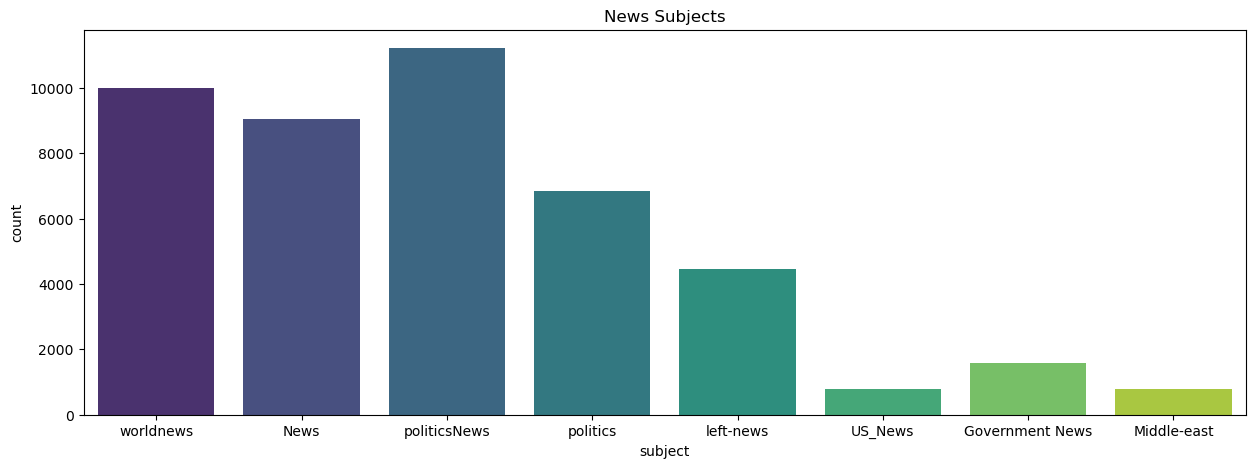

In [16]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
sns.countplot(data=all_news,x='subject',palette='viridis')
plt.title("News Subjects")


We need to check why there is values like [politicsNews, politics]

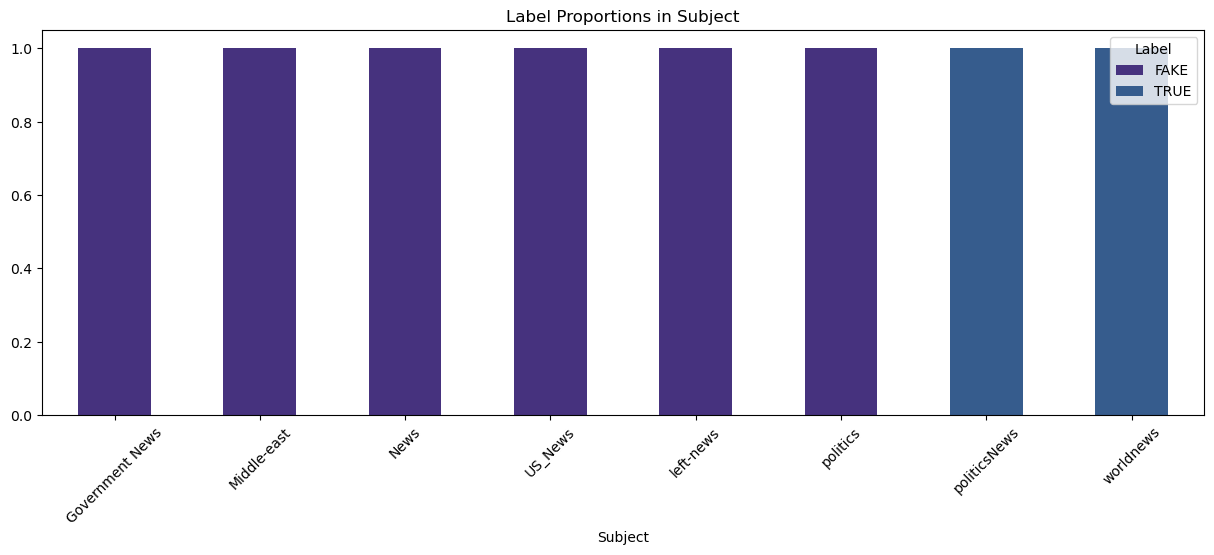

In [17]:
subject_group = pd.crosstab(all_news['subject'], all_news["Label"], normalize=0)
sns.set_palette("viridis")
subject_group.plot.bar(stacked=True, figsize=(15,5))
plt.title("Label Proportions in Subject")
plt.xlabel("Subject")
plt.xticks(rotation = 45)
plt.show()

- Because the data was splitted before and we merged it, it seems the sources of the data is not the same.  
**Conclusion: This column can help us determing whether the document deliver true info or fake ones.**

##### `date`

In [18]:
all_news['date'].sample(10)

32469           Jun 8, 2017
16304       April 12, 2017 
15073    December 14, 2017 
28970     September 2, 2016
20644    December 21, 2017 
1282           Nov 23, 2017
35095        March 15, 2016
17288          Apr 10, 2015
37688           Jun 2, 2015
38361      January 31, 2017
Name: date, dtype: object

We have two different formats (and there could be more) for the dates in the dataframe, one from each `.csv` we read the data from.  
Let's fix this problem.

In [19]:
all_news['date'] = all_news['date'].str.strip()
def convert_date(date_string):
  try:
    return pd.to_datetime(date_string, format="%B %d, %Y")
  except ValueError:
    try:
      return pd.to_datetime(date_string, format="%b %d, %Y")
    except ValueError:
      return pd.to_datetime(date_string, format="%d-%b-%y")

all_news['date'] = all_news['date'].apply(convert_date)

ValueError: time data 'https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg' does not match format '%d-%b-%y' (match)

This error shows a strange value in the data column.

In [20]:
all_news[all_news['date'] =='https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg']

,title,text,subject,date,Label
968,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,FAKE
12188,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,FAKE
24330,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,FAKE


This column is corrupt and it contains link in every field of the tuple.
This raises the question: "Are there more columns like this in our data?"

In [21]:
from dateutil.parser import parse
def is_valid_date(date_string):
  try:
    parse(date_string)
    return True
  except (ValueError, TypeError):
    return False

all_news['is_corrupted'] = all_news['date'].apply(is_valid_date)

corrupted_data = all_news[~all_news['is_corrupted']]
corrupted_data

,title,text,subject,date,Label,is_corrupted
968,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,FAKE,False
2764,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,FAKE,False
12188,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,FAKE,False
16539,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,FAKE,False
21432,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,FAKE,False
23911,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,FAKE,False
24330,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,FAKE,False
30890,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,FAKE,False
34637,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...,FAKE,False
44492,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,FAKE,False


We have 10 corrupt tuples, there is nothing in these tuples worth fixing so the best action is to drop them.

In [22]:
all_news.drop(all_news[~all_news['is_corrupted']].index,inplace=True)
all_news.drop(['is_corrupted'],inplace=True,axis=1)

Fake news problem across time.

In [23]:
def extract_year(date):
  try:
      parsed_date = parse(date)
  except (ValueError, TypeError):
      return None

  if parsed_date:
      return parsed_date.strftime("%Y")
  else:
      return None


all_news['Year'] = all_news['date'].apply(extract_year)

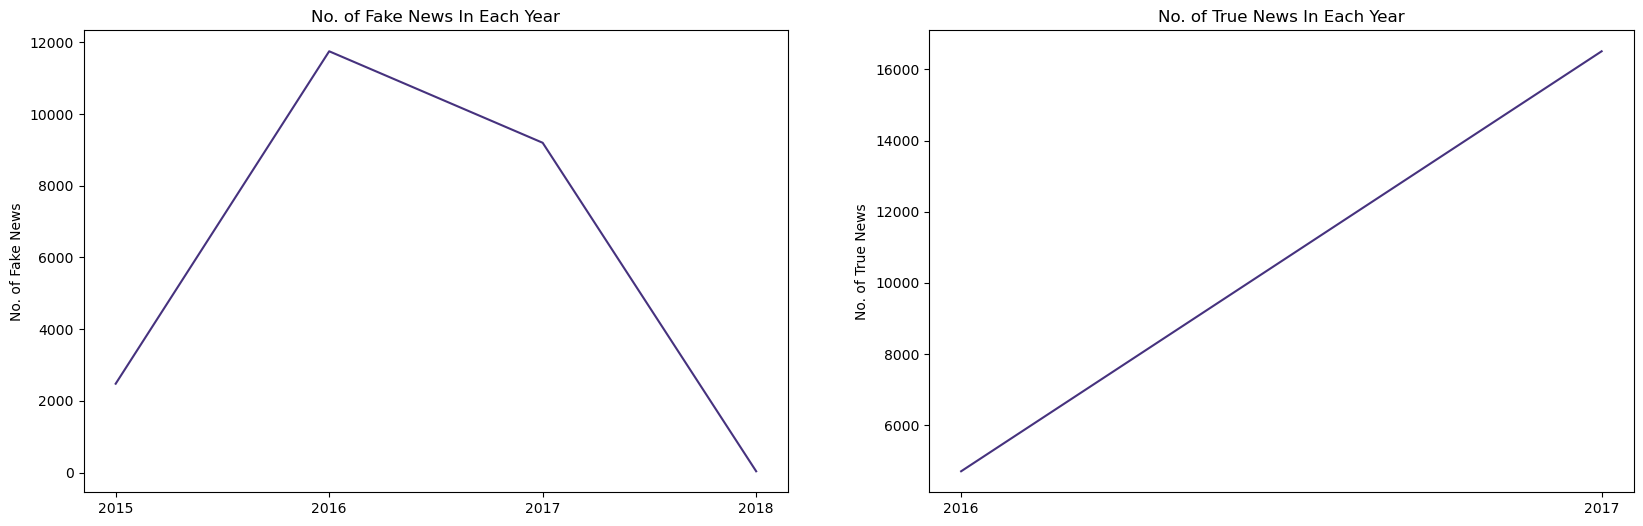

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
fake_across_years = all_news[all_news['Label'] == "FAKE"].groupby("Year")['Label'].agg('count')
true_across_years = all_news[all_news['Label'] == "TRUE"].groupby("Year")['Label'].agg('count')

ax1.plot(fake_across_years.index,fake_across_years.values)
ax2.plot(true_across_years.index,true_across_years.values)


ax1.set_ylabel("No. of Fake News")
ax1.set_title("No. of Fake News In Each Year")

ax2.set_ylabel("No. of True News")
ax2.set_title("No. of True News In Each Year")
plt.show()

- The fake news were collected across 4 years (2015-2018) and the true news were collected across 2 years (2016-2017) this can confuse our predictions that future news maybe all fake.
- This column uncovered some tuples that can corrupt our model in the process, although the date is not relevant to determining whether the news is fake or not.

##### `Label`
We constructed this column to help us classify the news after merging the two dataframes, let's see the count of every class in them.

FAKE    23468
TRUE    21211
Name: Label, dtype: int64


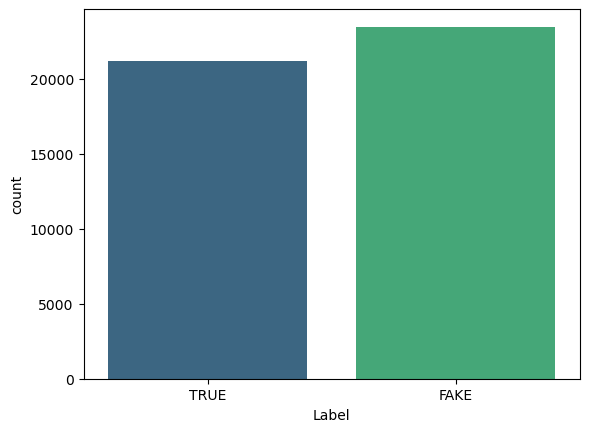

In [25]:
sns.countplot(data=all_news,x='Label',palette='viridis')
print(all_news['Label'].value_counts())

#### Step 1 Conclusion:
- **The feature we are keeping:**
    - Title: The title is more than enough to determine that the news is fake or not.
- The rest of the features does not contribute much in the determination of fake or not label.

In [26]:
all_news.drop(['text','subject','date','Year'],axis=1,inplace=True)

In [27]:
label_map = {"FAKE": 0, "TRUE": 1}

all_news['Label'] = all_news['Label'].map(label_map)

------------

## Step 2: Preprocessing Text.

#### In our quest to identify fake news articles, we'll be exploring two feature extraction techniques commonly used in Natural Language Processing (NLP): Bag-of-Words (BoW) and Term Frequency-Inverse Document Frequency (TF-IDF). Both approaches aim to convert textual data into numerical representations suitable for machine learning algorithms. Let's delve into each method:

#### 1. Bag-of-Words (BoW):

The Bag-of-Words model simplifies a document by creating a dictionary (or "vocabulary") of all unique words present in the corpus (collection of documents). Each document is then represented as a vector where each element corresponds to a word in the vocabulary. The value in the vector represents the word's frequency (count) within that specific document.

Pros of BoW:  

- Simple and efficient to implement.
- Captures basic word occurrence information.  

Cons of BoW:  

- Ignores word order and grammar.
- Doesn't consider the importance of words within a document or across the corpus.

In [28]:
df1 = all_news.copy()

In [29]:
X1 =  df1['title']
y1 = df1['Label']

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X1 = cv.fit_transform(X1)

**Now We Have Our Bag of Words**

### 2. TF-IDF:

TF-IDF builds upon the idea of BoW but incorporates additional factors to potentially improve the representation. It considers both the frequency of a word within a document (Term Frequency - TF) and its inverse document frequency (IDF). IDF reflects how common a word is across the entire corpus. Words that appear frequently throughout the corpus (e.g., "the", "a") will have a lower IDF weight, while words that are specific and occur less frequently will have a higher weight. This weighting helps emphasize words that are more distinctive and potentially more informative for classification tasks.

Pros of TF-IDF:

- Considers both word frequency within a document and its overall corpus frequency.
- Can potentially downplay the influence of common words and highlight more discriminative terms.  

Cons of TF-IDF:

- Slightly more complex to calculate compared to BoW.

In [31]:
df2 = all_news.copy()

In [32]:
X2 =  df2['title']
y2 = df2['Label']

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer()

X2 = tf_idf.fit_transform(X2)

**We Now Have Our TF-IDF Vector**

----

## Step 3: Modelling 

### This is a classification problem so we are going to use these models:
- Logistic Regression
- K-Nearest Neighbors
- Support Vector Machine (SVM)
- Decision Tree
- Random Forest
- XGBoost

### We will use these metrics to evaluate our model:
- Accuracy Score
- Precision
- Recall
- F1-Score


#### Imports

In [34]:
# Importing the Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [35]:
# Importing Splitting Library and Model Evaluation Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

#### Functions

In [36]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='binary'),
                                recall_score(y_test, y_pred, average='binary'),
                                f1_score(y_test, y_pred, average='binary')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = [model_name])

    result = (result * 100).round(2).astype(str) + '%'
    return result

In [37]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports,
    confusion matrix and ROC curve.
    '''
    sns.set(font_scale=1.2)

    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))

    # Create figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap='Blues', ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')
    ax1.grid(False)

    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax2.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(2, 2)
    table.set_fontsize(12)
    ax2.axis('tight')
    ax2.axis('off')
    # Modify color
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('blue')
    plt.tight_layout()
    plt.show()

## Modelling Using BoW

#### Splitting the data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

### `Logistic Regression`

c:\Users\Divo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18822
           1       0.99      0.99      0.99     16921

    accuracy                           0.99     35743
   macro avg       0.99      0.99      0.99     35743
weighted avg       0.99      0.99      0.99     35743


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      4646
           1       0.96      0.97      0.97      4290

    accuracy                           0.97      8936
   macro avg       0.97      0.97      0.97      8936
weighted avg       0.97      0.97      0.97      8936



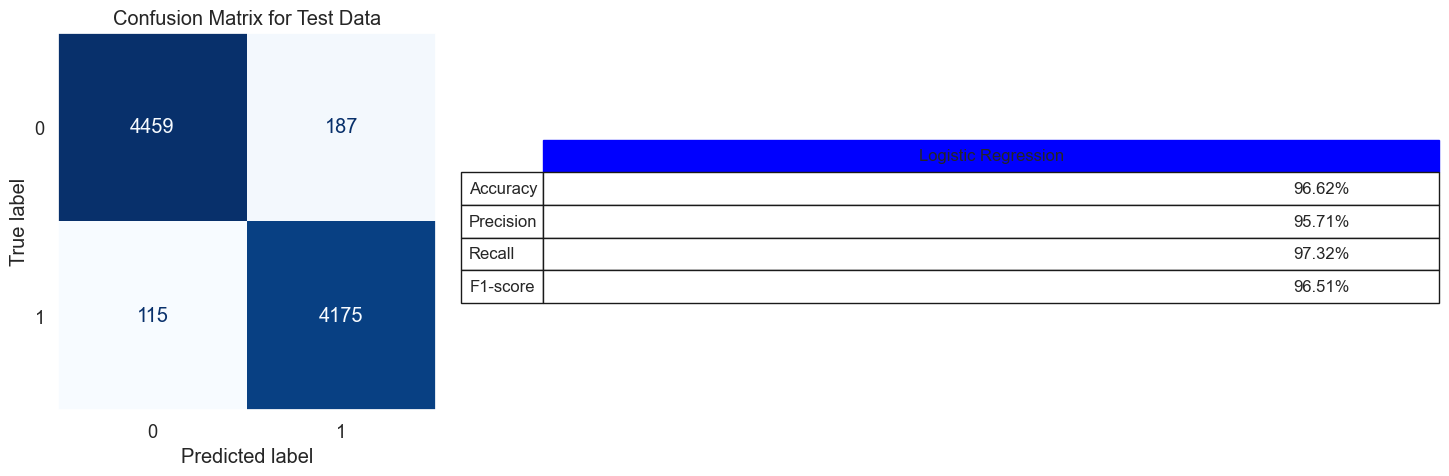

In [39]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
model_evaluation(lr,X_train,X_test,y_train,y_test,"Logistic Regression")

### `K-Nearest Neighbors`


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.85      0.90     18822
           1       0.85      0.96      0.90     16921

    accuracy                           0.90     35743
   macro avg       0.90      0.90      0.90     35743
weighted avg       0.91      0.90      0.90     35743


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.69      0.78      4646
           1       0.73      0.91      0.81      4290

    accuracy                           0.79      8936
   macro avg       0.81      0.80      0.79      8936
weighted avg       0.81      0.79      0.79      8936



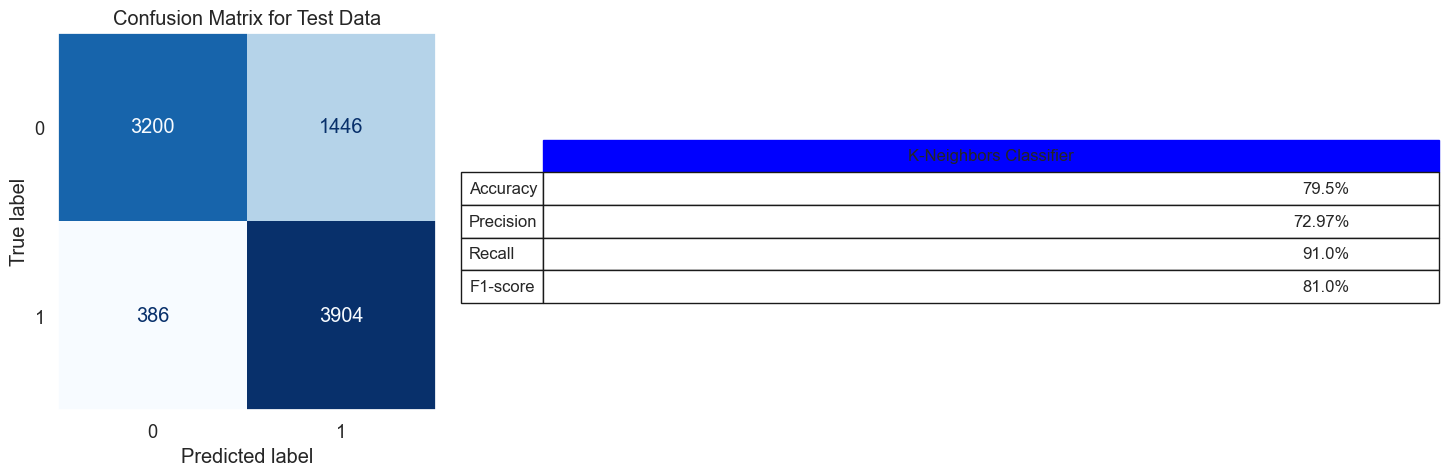

In [40]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
model_evaluation(knn,X_train,X_test,y_train,y_test,"K-Neighbors Classifier")

### `Support Vector Machine`


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18822
           1       1.00      1.00      1.00     16921

    accuracy                           1.00     35743
   macro avg       1.00      1.00      1.00     35743
weighted avg       1.00      1.00      1.00     35743


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      4646
           1       0.96      0.97      0.96      4290

    accuracy                           0.96      8936
   macro avg       0.96      0.97      0.96      8936
weighted avg       0.96      0.96      0.96      8936



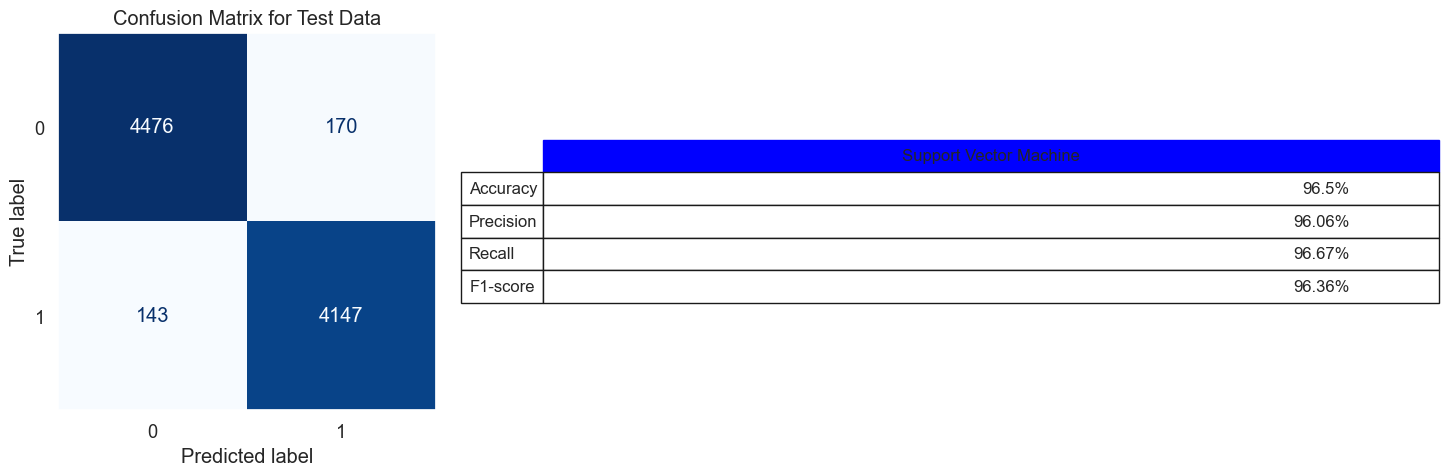

In [41]:
svc = SVC(kernel = 'linear', random_state = 0)

svc.fit(X_train,y_train)
model_evaluation(svc,X_train,X_test,y_train,y_test,"Support Vector Machine")

### `Decision Tree`


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18822
           1       1.00      1.00      1.00     16921

    accuracy                           1.00     35743
   macro avg       1.00      1.00      1.00     35743
weighted avg       1.00      1.00      1.00     35743


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4646
           1       0.91      0.91      0.91      4290

    accuracy                           0.92      8936
   macro avg       0.92      0.92      0.92      8936
weighted avg       0.92      0.92      0.92      8936



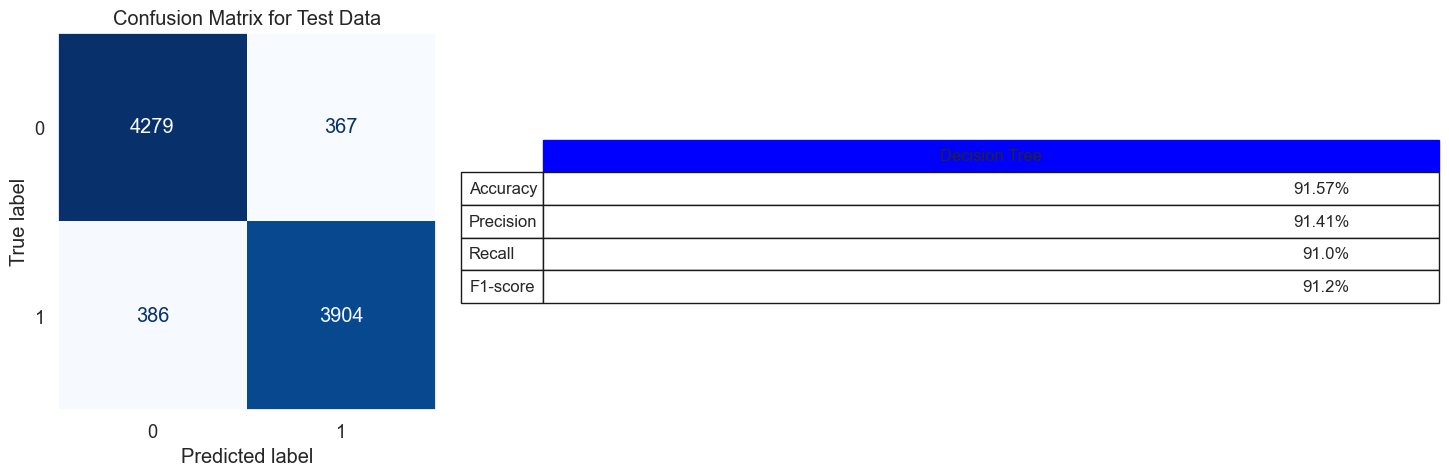

In [43]:
Dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
Dt.fit(X_train,y_train)
model_evaluation(Dt,X_train,X_test,y_train,y_test,"Decision Tree")

### `Random Forest`


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18822
           1       1.00      1.00      1.00     16921

    accuracy                           1.00     35743
   macro avg       1.00      1.00      1.00     35743
weighted avg       1.00      1.00      1.00     35743


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4646
           1       0.95      0.95      0.95      4290

    accuracy                           0.95      8936
   macro avg       0.95      0.95      0.95      8936
weighted avg       0.95      0.95      0.95      8936



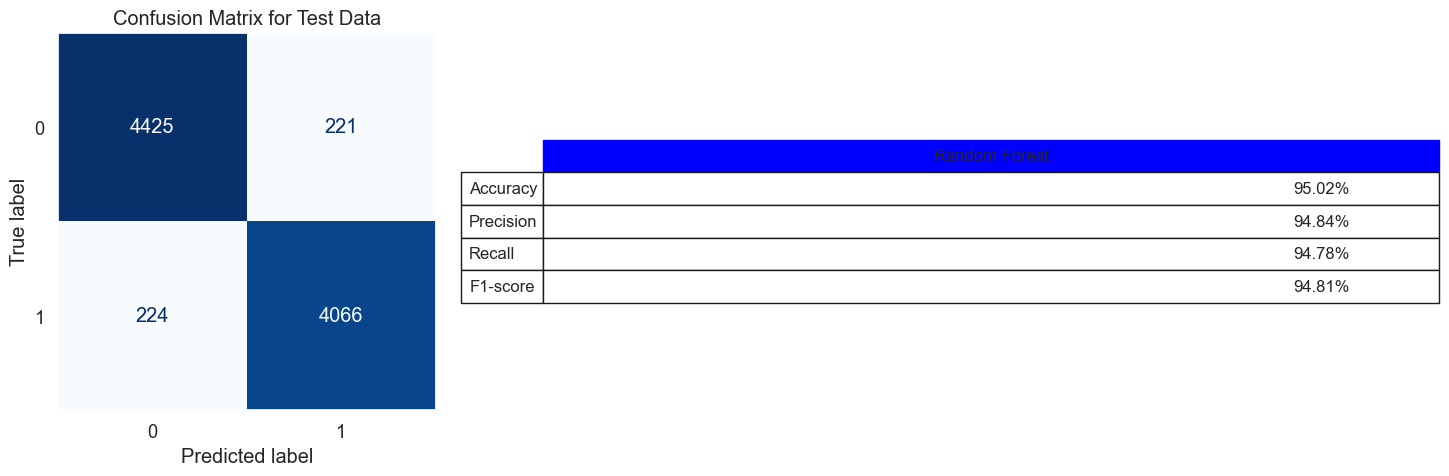

In [44]:
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

rf.fit(X_train,y_train)
model_evaluation(rf,X_train,X_test,y_train,y_test,"Random Forest")

### `XGBoost`


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     18822
           1       0.91      0.97      0.94     16921

    accuracy                           0.94     35743
   macro avg       0.94      0.94      0.94     35743
weighted avg       0.94      0.94      0.94     35743


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      4646
           1       0.89      0.96      0.92      4290

    accuracy                           0.92      8936
   macro avg       0.93      0.93      0.92      8936
weighted avg       0.93      0.92      0.92      8936



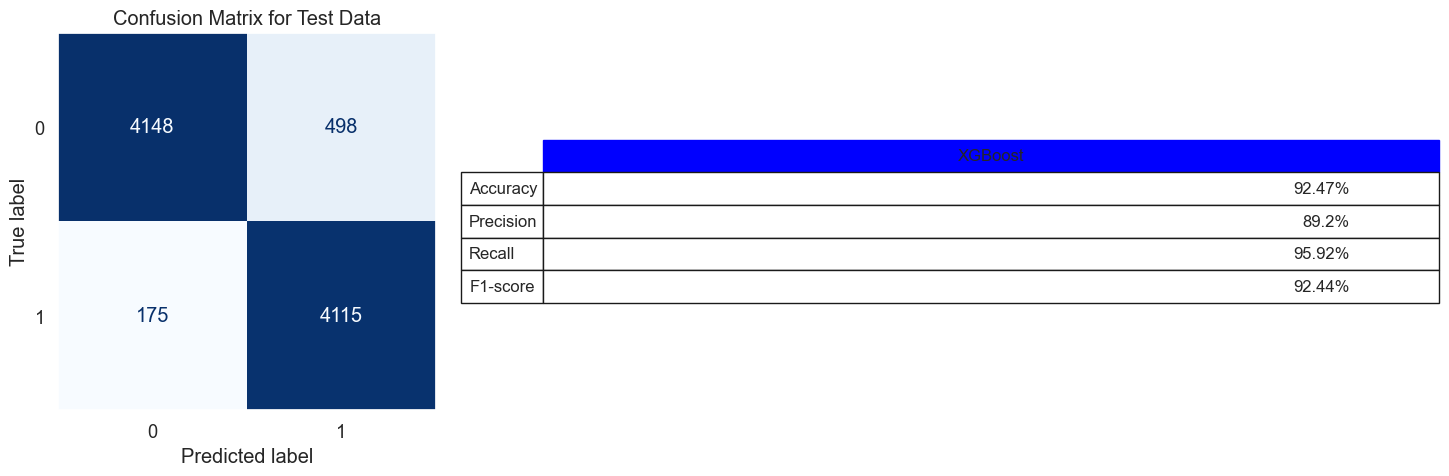

In [45]:
xgbc = XGBClassifier()

xgbc.fit(X_train,y_train)
model_evaluation(xgbc,X_train,X_test,y_train,y_test,"XGBoost")

### Summary:
|          Model         | Train Accuracy | Test Accuracy |
|:----------------------:|----------------|---------------|
|   Logistic Regression  |       97%      |      97%      |
|   K-Nearest Neighbors  |       90%      |      79%      |
| Support Vector Machine |      100%      |      96%      |
|      Decision Tree     |      100%      |      92%      |
|      Random Forest     |      100%      |      95%      |
|         XGBoost        |       94%      |      92%      |

The best model that performed well on the train and the test data is the logistic regression, the worst model is k-nearest neighbors and the rest of the models have close testing accuracy.

## Modelling Using TF-IDF

#### Splitting the data

In [46]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=0)

### `Logistic Regression`


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     18822
           1       0.96      0.97      0.97     16921

    accuracy                           0.97     35743
   macro avg       0.97      0.97      0.97     35743
weighted avg       0.97      0.97      0.97     35743


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4646
           1       0.94      0.96      0.95      4290

    accuracy                           0.95      8936
   macro avg       0.95      0.95      0.95      8936
weighted avg       0.95      0.95      0.95      8936



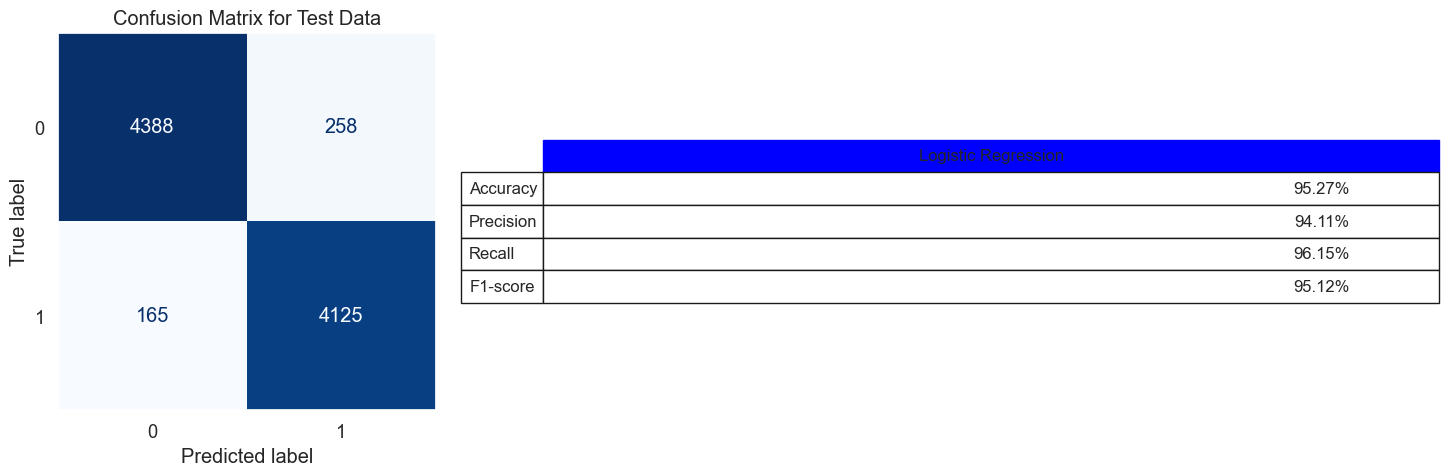

In [47]:
lr2 = LogisticRegression()
lr2.fit(X_train2,y_train2)
model_evaluation(lr2,X_train2,X_test2,y_train2,y_test2,"Logistic Regression")

### `K-Nearest Neighbor`


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     18822
           1       0.94      0.96      0.95     16921

    accuracy                           0.95     35743
   macro avg       0.95      0.95      0.95     35743
weighted avg       0.95      0.95      0.95     35743


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      4646
           1       0.86      0.92      0.89      4290

    accuracy                           0.89      8936
   macro avg       0.89      0.89      0.89      8936
weighted avg       0.89      0.89      0.89      8936



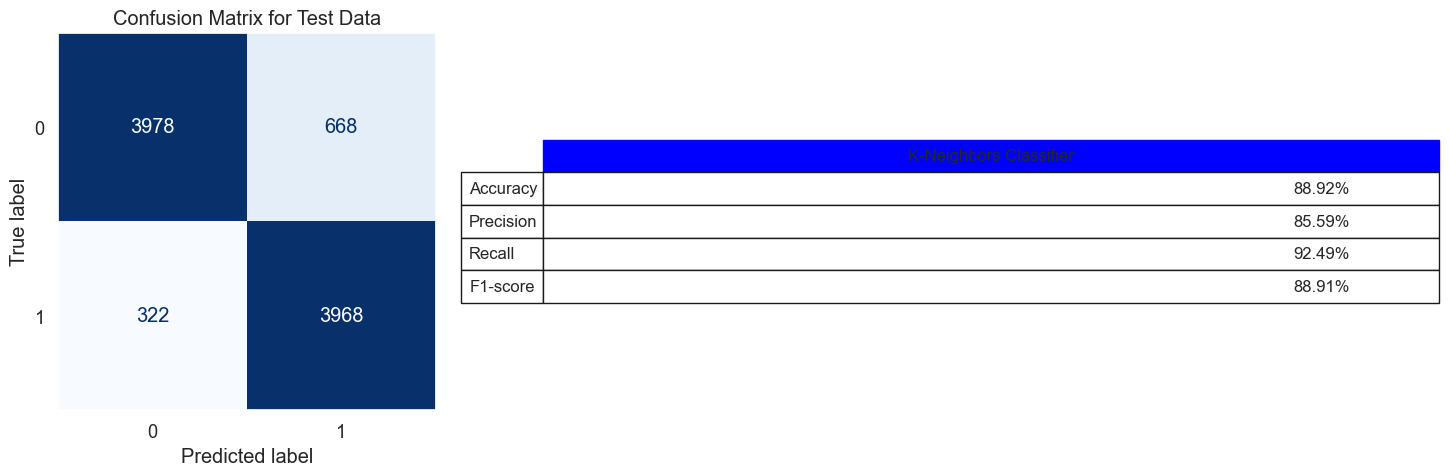

In [48]:
knn2 = KNeighborsClassifier(n_neighbors=3)

knn2.fit(X_train2,y_train2)
model_evaluation(knn2,X_train2,X_test2,y_train2,y_test2,"K-Neighbors Classifier")

### `Support Vector Machine`


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     18822
           1       0.98      0.99      0.98     16921

    accuracy                           0.98     35743
   macro avg       0.98      0.98      0.98     35743
weighted avg       0.98      0.98      0.98     35743


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      4646
           1       0.95      0.97      0.96      4290

    accuracy                           0.96      8936
   macro avg       0.96      0.96      0.96      8936
weighted avg       0.96      0.96      0.96      8936



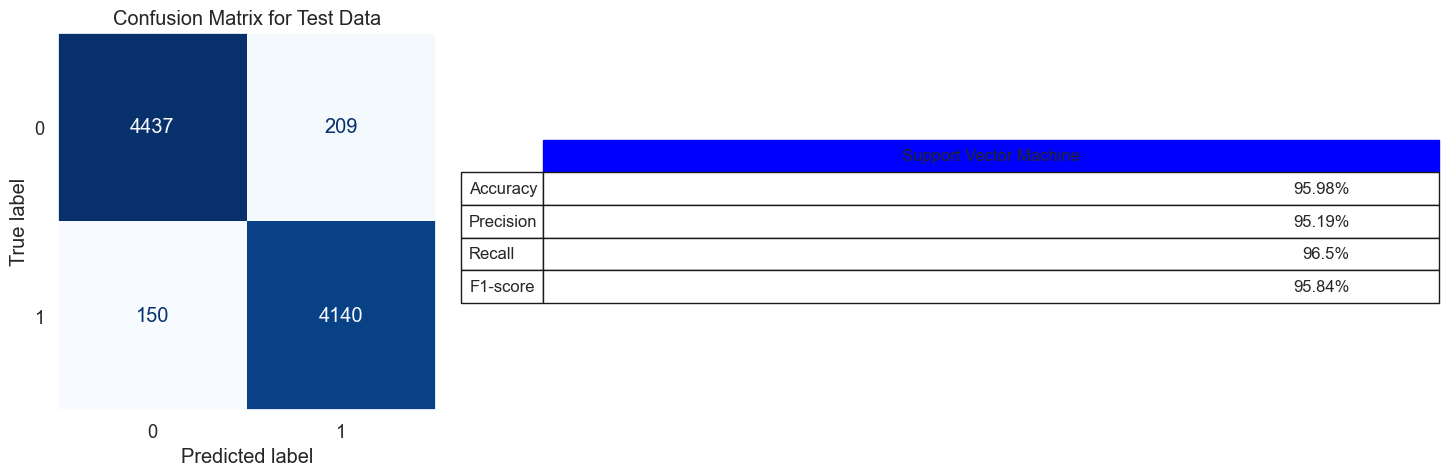

In [49]:
svc2 = SVC(kernel = 'linear', random_state = 0)

svc2.fit(X_train2,y_train2)
model_evaluation(svc2,X_train2,X_test2,y_train2,y_test2,"Support Vector Machine")

### `Decision Tree`


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18822
           1       1.00      1.00      1.00     16921

    accuracy                           1.00     35743
   macro avg       1.00      1.00      1.00     35743
weighted avg       1.00      1.00      1.00     35743


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4646
           1       0.92      0.91      0.91      4290

    accuracy                           0.92      8936
   macro avg       0.92      0.92      0.92      8936
weighted avg       0.92      0.92      0.92      8936



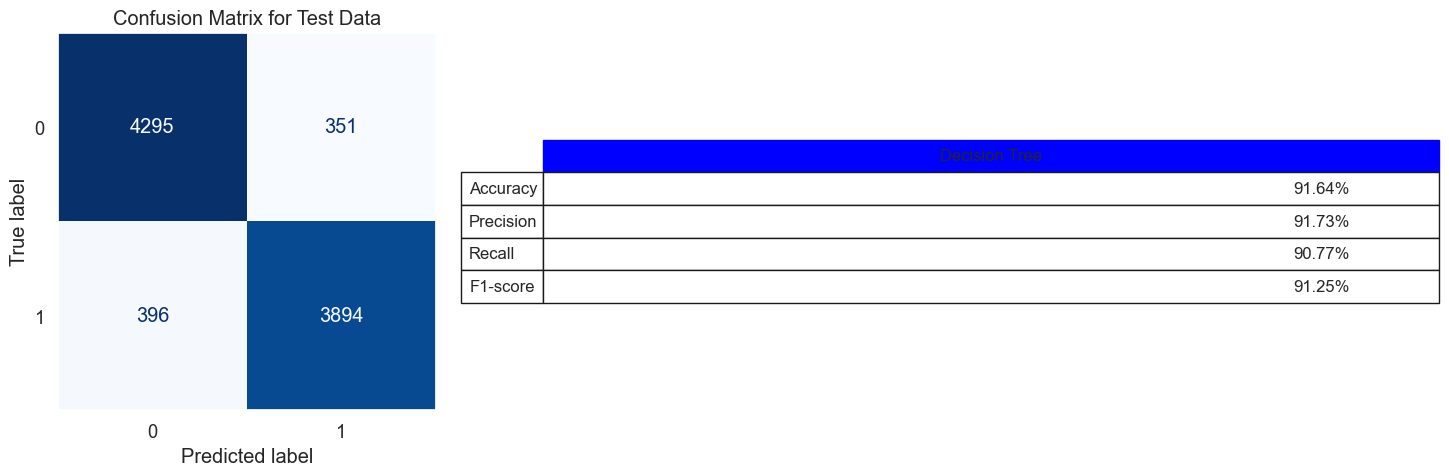

In [50]:
Dt2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
Dt2.fit(X_train2,y_train2)
model_evaluation(Dt2,X_train2,X_test2,y_train2,y_test2,"Decision Tree")

### `Random Forest`


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18822
           1       1.00      1.00      1.00     16921

    accuracy                           1.00     35743
   macro avg       1.00      1.00      1.00     35743
weighted avg       1.00      1.00      1.00     35743


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      4646
           1       0.95      0.95      0.95      4290

    accuracy                           0.95      8936
   macro avg       0.95      0.95      0.95      8936
weighted avg       0.95      0.95      0.95      8936



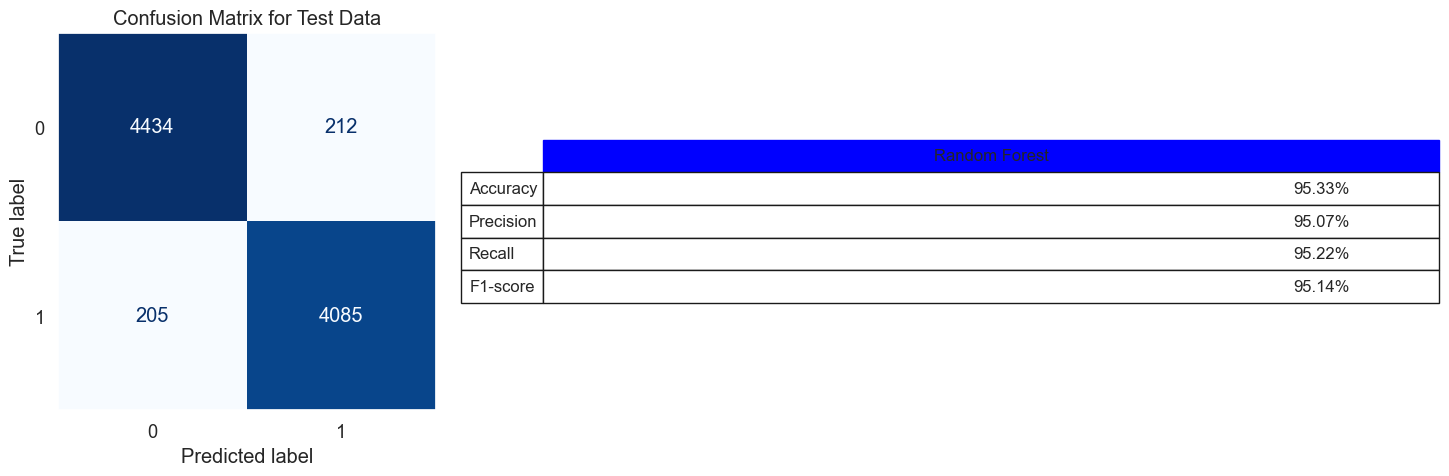

In [51]:
rf2 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

rf2.fit(X_train2,y_train2)
model_evaluation(rf2,X_train2,X_test2,y_train2,y_test2,"Random Forest")

### `XGBoost`


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     18822
           1       0.93      0.97      0.95     16921

    accuracy                           0.95     35743
   macro avg       0.95      0.95      0.95     35743
weighted avg       0.95      0.95      0.95     35743


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      4646
           1       0.91      0.96      0.94      4290

    accuracy                           0.94      8936
   macro avg       0.94      0.94      0.94      8936
weighted avg       0.94      0.94      0.94      8936



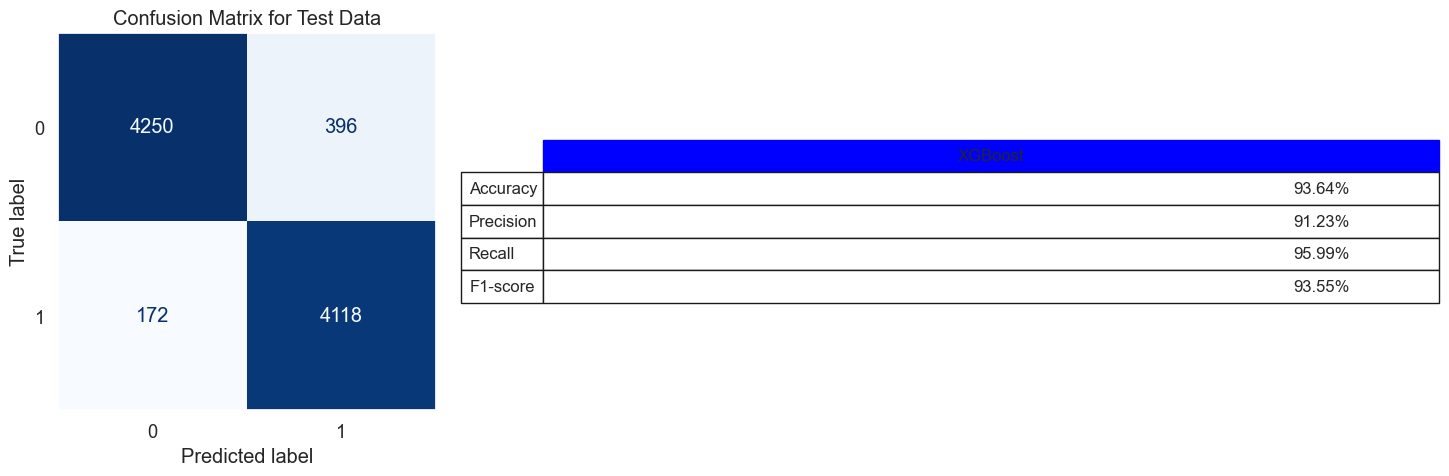

In [52]:
xgbc2 = XGBClassifier()

xgbc2.fit(X_train2,y_train2)
model_evaluation(xgbc2,X_train2,X_test2,y_train2,y_test2,"XGBoost")

### Summary:
|          Model         | Train Accuracy | Test Accuracy |
|:----------------------:|----------------|---------------|
|   Logistic Regression  |       97%      |      95%      |
|   K-Nearest Neighbors  |       95%      |      89%      |
| Support Vector Machine |      98%       |      96%      |
|      Decision Tree     |      100%      |      92%      |
|      Random Forest     |      100%      |      95%      |
|         XGBoost        |       95%      |      94%      |

Support Vector Machine outperformed Logistic Regression when using TF-IDF vectorization, K-Nearest Neighbors got slightly better than the BoW approach and the rest of the models got from slight to no imporovement in the performance between training and testing data.

## Conclusion: The BoW and TF-IDF have close scores on this data so using either approaches it will not make a huge difference but TF-IDF is favourable because it gives semantic meaning to the words vector.